Linear Regression with Scikit learn

The following topics are covered in this tutorial:

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables 
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Other models and techniques for regression using Scikit-learn
- Applying linear regression to other datasets

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

In [68]:
df=pd.read_csv("insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [71]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Visualization

1.Age

In [72]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

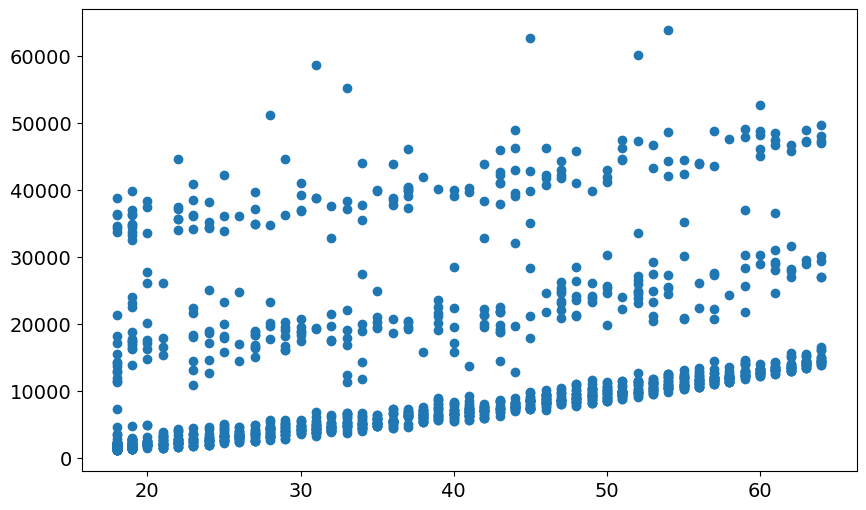

In [73]:
X=np.array(df["age"])
Y=np.array(df["charges"])

plt.scatter(X,Y)
plt.show()


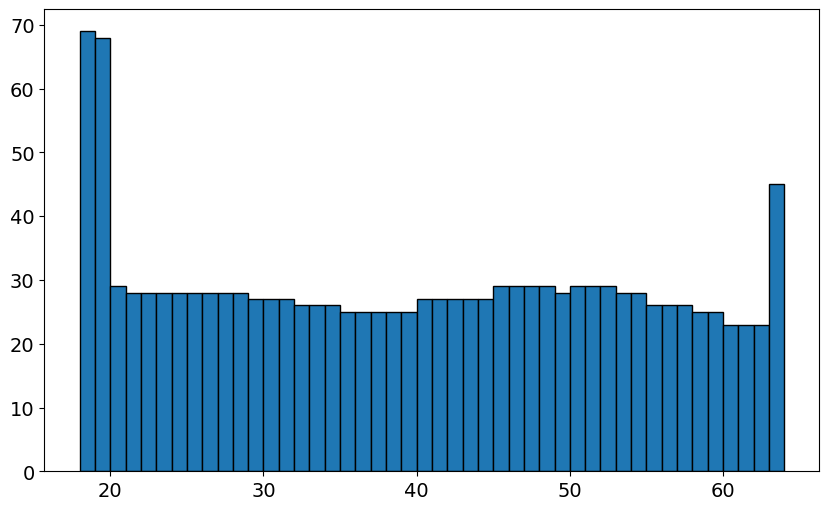

In [74]:
plt.hist(X, bins=range(min(X), max(X) +1), edgecolor='black')
plt.show()

In [75]:
px.histogram(df,x="age",nbins=47,title="Distrinution of age")

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.

In [76]:
px.scatter(df,x="age",y="charges",color="smoker")


- The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

- The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

- The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.


2.BMI

In [77]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

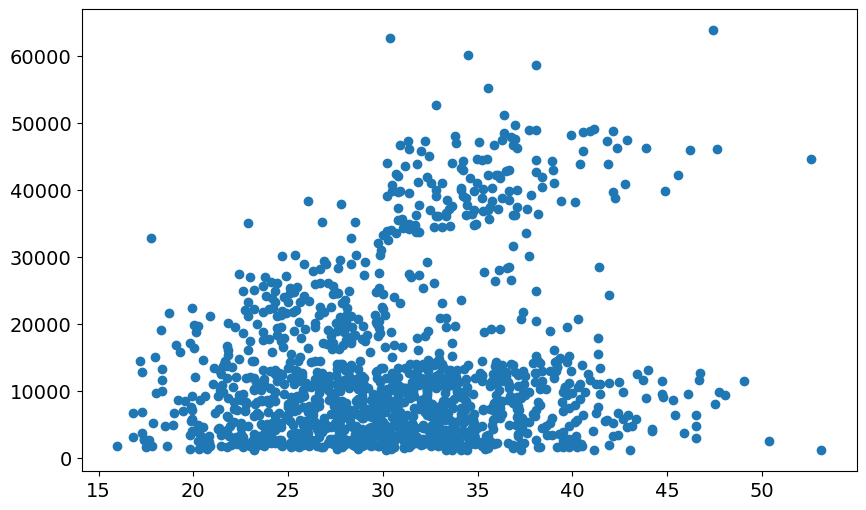

In [78]:
X=np.array(df["bmi"])
Y=np.array(df["charges"])

plt.scatter(X,Y)
plt.show()

In [79]:
px.scatter(df, x='bmi', y='charges', color='smoker', title='BMI vs. Charges')

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

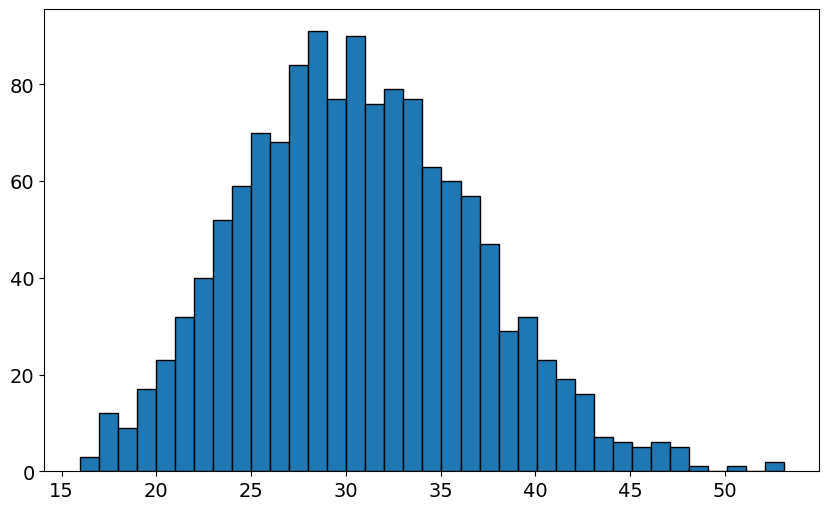

In [80]:
bin_width = 1  
bins = int((max(X) - min(X)) / bin_width)
plt.hist(X, bins=bins, edgecolor='black')
plt.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

3.Children


In [81]:
df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

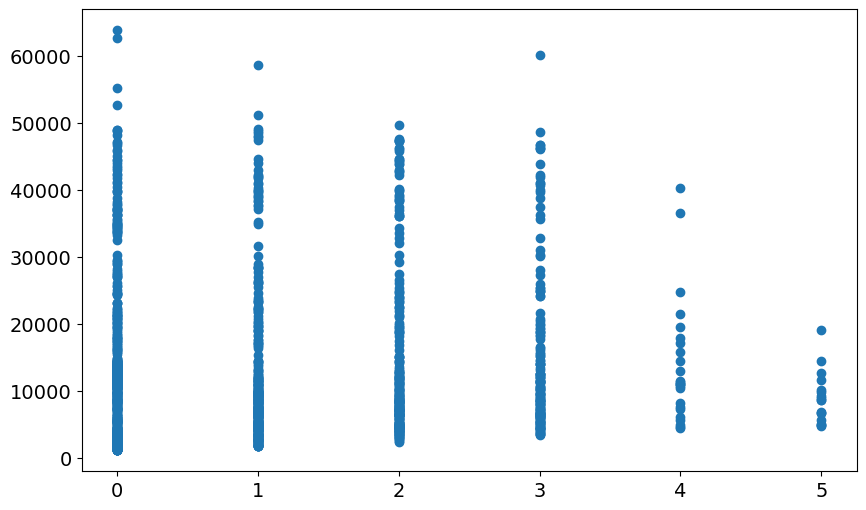

In [82]:
X=np.array(df["children"])
Y=np.array(df["charges"])

plt.scatter(X,Y)
plt.show()

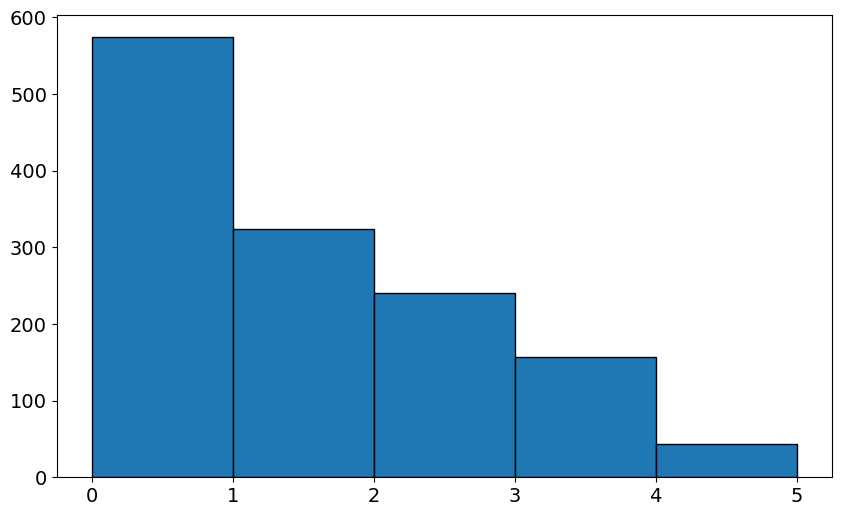

In [83]:
plt.hist(X, bins=range(min(X), max(X) +1), edgecolor='black')
plt.show()

Charges

In [84]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

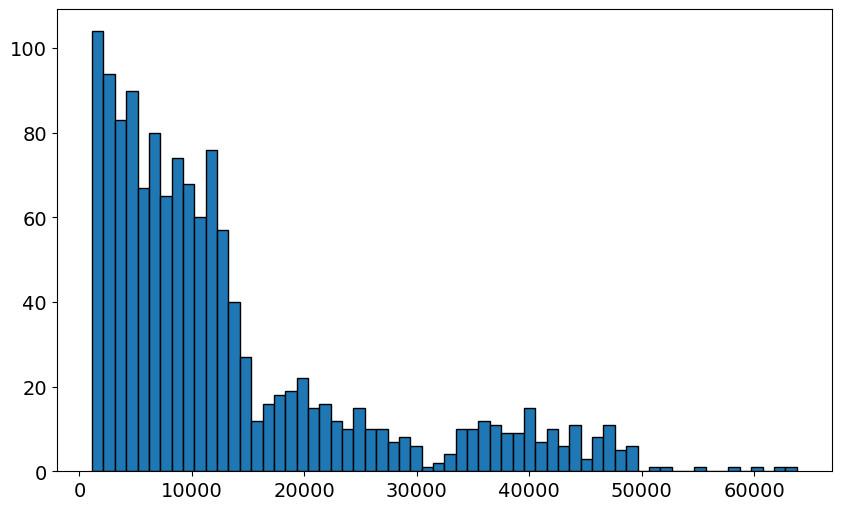

In [85]:
bin_width = 1000  
bins = int((max(Y) - min(Y)) / bin_width)
plt.hist(Y, bins=bins, edgecolor='black')
plt.show()

For most customers, the annual medical charges are under \$10,000.

4.Smoker

In [86]:
df.smoker.describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [87]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

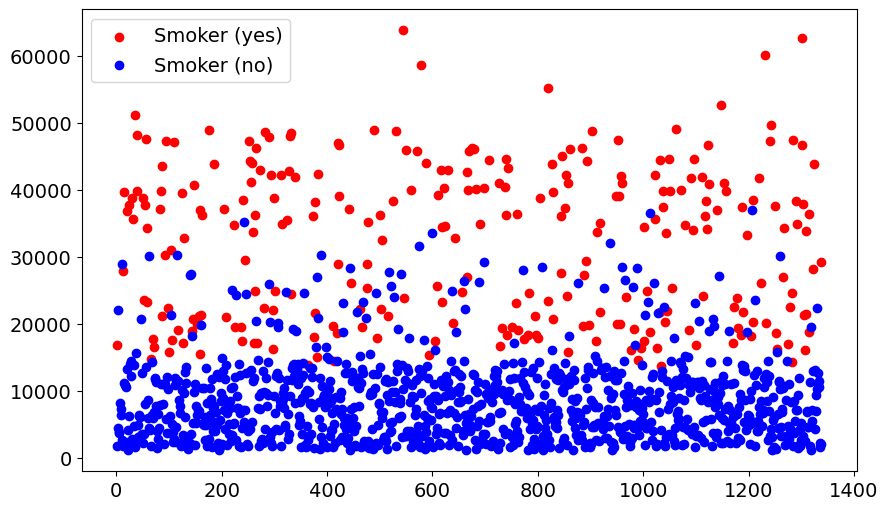

In [88]:
X=np.array(df["smoker"])
Y=np.array(df["charges"])

x=np.linspace(1,len(X),len(X))

x_yes = x[X == "yes"]
y_yes = Y[X == "yes"]
x_no = x[X == "no"]
y_no = Y[X == "no"]


plt.scatter(x_yes, y_yes, color='red', label='Smoker (yes)')
plt.scatter(x_no, y_no, color='blue', label='Smoker (no)')

plt.legend()
plt.show()

5.Sex


In [89]:
df.sex.describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [90]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

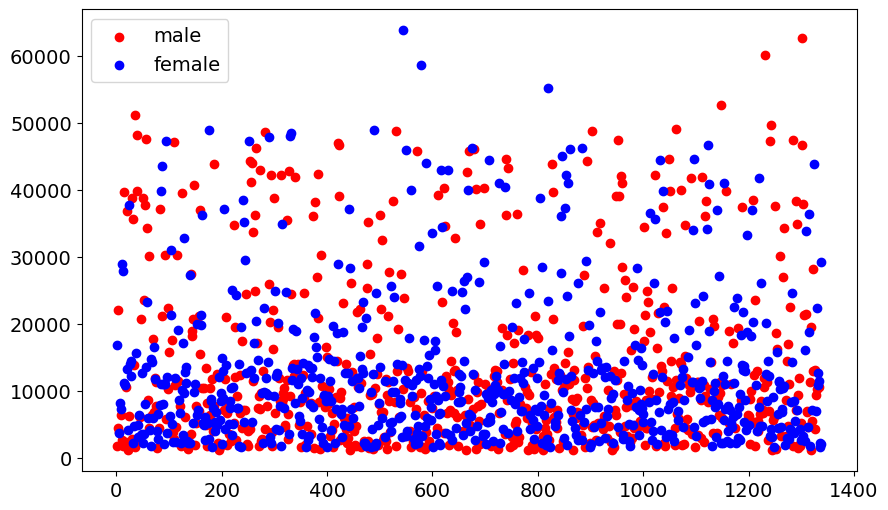

In [91]:
X=np.array(df["sex"])
Y=np.array(df["charges"])

x=np.linspace(1,len(X),len(X))

x_yes = x[X == "male"]
y_yes = Y[X == "male"]
x_no = x[X == "female"]
y_no = Y[X == "female"]

plt.scatter(x_yes, y_yes, color='red', label='male')
plt.scatter(x_no, y_no, color='blue', label='female')

plt.legend()
plt.show()

6.Region


In [92]:
df.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [93]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

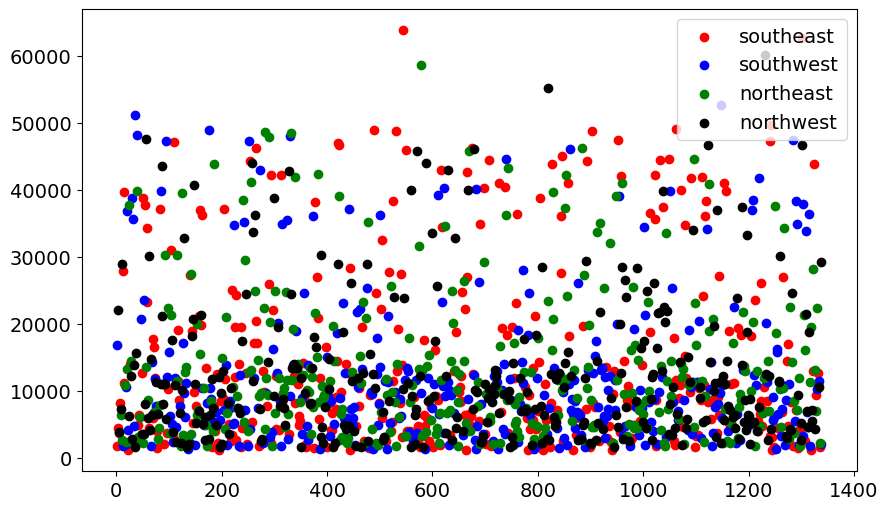

In [94]:
X = np.array(df["region"])
Y = np.array(df["charges"])

x = np.linspace(1, len(X), len(X))

x_southeast = x[X == "southeast"]
y_southeast = Y[X == "southeast"]
x_southwest = x[X == "southwest"]
y_southwest = Y[X == "southwest"]
x_northeast = x[X == "northeast"]
y_northeast = Y[X == "northeast"]
x_northwest = x[X == "northwest"]
y_northwest = Y[X == "northwest"]

plt.scatter(x_southeast, y_southeast, color='red', label='southeast')
plt.scatter(x_southwest, y_southwest, color='blue', label='southwest')
plt.scatter(x_northeast, y_northeast, color='green', label='northeast')
plt.scatter(x_northwest, y_northwest, color='black', label='northwest')

plt.legend()
plt.show()

Correlation

the values in some columns are more closely related to the values in "charges" compared to other columns.
This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.



In [95]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [96]:
df1=df.copy()
df1=df1.drop(["sex", "region", "smoker"],axis=1)

df1.corr()



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [97]:
print(df)
smoker_mapping = {"no": 0, "yes": 1}
gender_mapping = {"female": 0, "male": 1}
region_mapping = {"northeast": 1, "northwest": 2, "southeast": 3, "southwest": 4}

df["smoker"] = df["smoker"].map(smoker_mapping)
df["sex"] = df["sex"].map(gender_mapping)
df["region"] = df["region"].map(region_mapping)


print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       4  16884.92400
1      18    1  33.770         1       0       

In [98]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


correlation cofficient

strength=The greater the abs value of the correlation coefficient the stronger the relationship

direction=The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. 

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. 

Linear regression using single feature

In [99]:
import sklearn
from sklearn.linear_model import LinearRegression

Best fit line age vs charges

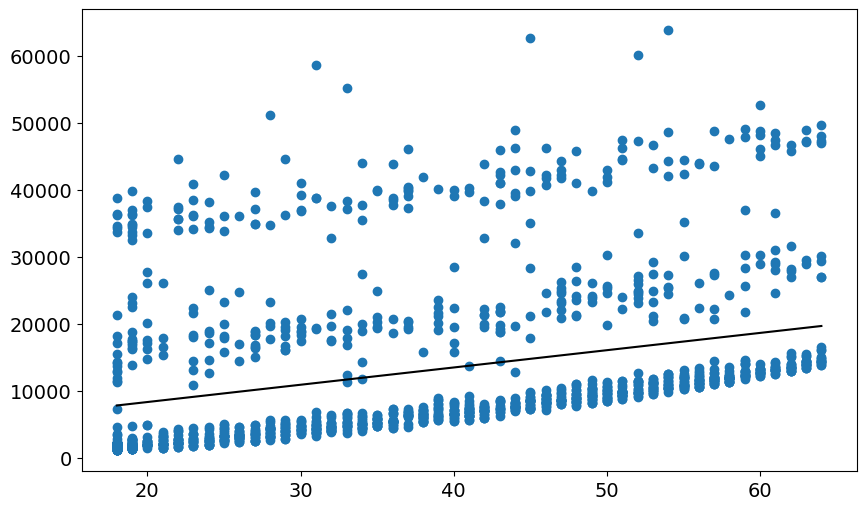

In [100]:
input=np.array([df["age"]]).reshape(-1,1)
target=np.array(df["charges"])

mod=LinearRegression()

mod.fit(input,target)

x1=np.arange(18,65).reshape(-1,1)
y1=mod.predict(x1)

X=np.array(df["age"])
Y=np.array(df["charges"])

plt.scatter(X,Y)
plt.plot(x1,y1,color="black")
plt.show()



In [101]:
pred=mod.predict(input)
print(pred)
print(target)

err=np.sqrt(np.mean((target - pred) ** 2))
print(err)

[ 8062.61476073  7804.89214207 10382.11832874 ...  7804.89214207
  8578.05999807 18886.96474474]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
11551.66562075632


scaling

In [102]:
from sklearn.preprocessing import StandardScaler
input=StandardScaler().fit_transform(input)

mod=LinearRegression().fit(input,target)

pred=mod.predict(input)
print(pred)
print(target)

err=np.sqrt(np.mean((target - pred) ** 2))
print(err)

[ 8062.61476073  7804.89214207 10382.11832874 ...  7804.89214207
  8578.05999807 18886.96474474]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
11551.66562075632


No smoker

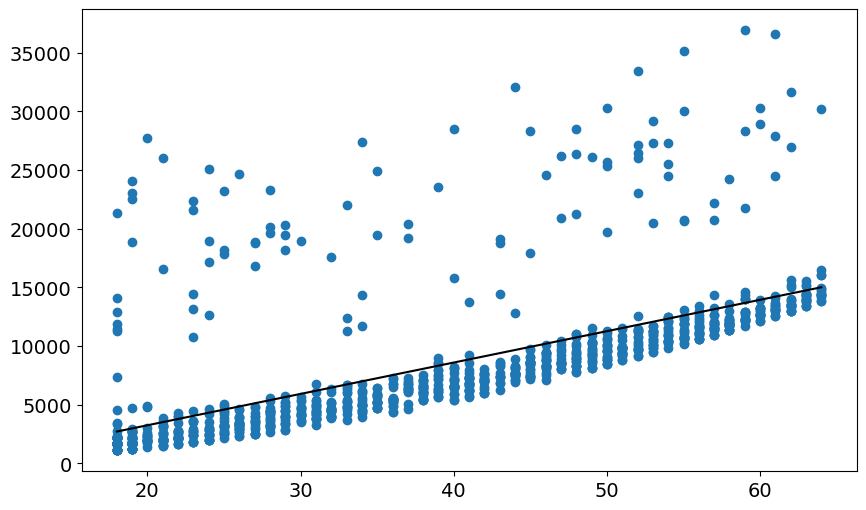

In [103]:
no_smoker=df[df.smoker==0]
input1=np.array([no_smoker["age"]]).reshape(-1,1)
target1=np.array(no_smoker["charges"])

mod1=LinearRegression()

mod1.fit(input1,target1)

x1=np.arange(18,65).reshape(-1,1)
y1=mod1.predict(x1)

X=np.array(no_smoker["age"])
Y=np.array(no_smoker["charges"])

plt.scatter(X,Y)
plt.plot(x1,y1,color="black")
plt.show()

In [104]:
pred=mod1.predict(input1)
print(pred)
print(target1)

err=np.sqrt(np.mean((target1 - pred) ** 2))
print(err)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
[ 1725.5523   4449.462   21984.47061 ...  2205.9808   1629.8335
  2007.945  ]
4662.505766636395


The parameters of the model is stored in the coef_ and intercept_

In [105]:
print(mod1.coef_)
print(mod1.intercept_)

[267.24891283]
-2091.4205565650864


In [106]:
from sklearn.preprocessing import StandardScaler
input1=StandardScaler().fit_transform(input1)


mod1=LinearRegression().fit(input1,target1)

pred=mod1.predict(input1)
print(pred)
print(target1)

err=np.sqrt(np.mean((target1 - pred) ** 2))
print(err)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
[ 1725.5523   4449.462   21984.47061 ...  2205.9808   1629.8335
  2007.945  ]
4662.505766636395


SGDRegressor

In [107]:
from sklearn.linear_model import SGDRegressor

In [108]:
mod2=SGDRegressor().fit(input1,target1)

pred1=mod2.predict(input1)
print(pred1)
print(target1)

err=np.sqrt(np.mean((target1 - pred1) ** 2))
print(err)

print(mod2.coef_)
print(mod2.intercept_)



[2698.5967843  5378.50538606 6718.45968694 ... 2698.5967843  2698.5967843
 3502.56936482]
[ 1725.5523   4449.462   21984.47061 ...  2205.9808   1629.8335
  2007.945  ]
4662.519729924687
[3772.45114566]
[8429.67200277]


Linear Regression using Multiple Features

In [109]:
no_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,3,3756.62160
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,4,11411.68500
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,1,2205.98080
1335,18,0,36.850,0,0,3,1629.83350


In [110]:
inputs,targets=no_smoker[["age","sex","bmi","children","region"]],no_smoker["charges"]

inputs=np.array(inputs)
targets=np.array(targets)

mod3=LinearRegression().fit(inputs,targets)

pred3=mod3.predict(inputs)

loss=np.sqrt(np.mean((targets - pred3) ** 2))
print(loss)

print(mod3.coef_)
print(mod3.intercept_)

4573.22350648627
[ 264.58548895 -526.74628825   18.47782797  587.26685687 -461.98493162]
-1774.4275698284291


In [111]:
inputs=StandardScaler().fit_transform(inputs)

mod3=LinearRegression().fit(inputs,targets)

pred3=mod3.predict(inputs)

loss=np.sqrt(np.mean((targets - pred3) ** 2))
print(loss)

print(mod3.coef_)
print(mod3.intercept_)

4573.22350648627
[3724.51444893 -263.26843438  111.61108685  715.03468362 -513.3391071 ]
8434.268297856204


with smoker

In [112]:
inputs,targets=df[["age","sex","bmi","children","region","smoker"]],df["charges"]

inputs=np.array(inputs)
targets=np.array(targets)

mod3=LinearRegression().fit(inputs,targets)

pred3=mod3.predict(inputs)

loss=np.sqrt(np.mean((targets - pred3) ** 2))
print(loss)

print(mod3.coef_)
print(mod3.intercept_)

6043.811701706331
[  257.28807486  -131.11057962   332.57013224   479.36939355
  -353.64001656 23820.43412267]
-11461.81230467253


The loss reduces from 11551 to 6043

One Hot Encoding

In [113]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder()
enc.fit(df[["region"]])
enc.categories_

[array([1, 2, 3, 4])]

In [114]:
one_hot=enc.transform(df[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [115]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [116]:
inputs,targets=df[["age","sex","bmi","children","smoker",'northeast', 'northwest', 'southeast', 'southwest']],df["charges"]

inputs=np.array(inputs)
targets=np.array(targets)

mod3=LinearRegression().fit(inputs,targets)

pred3=mod3.predict(inputs)

loss=np.sqrt(np.mean((targets - pred3) ** 2))
print(loss)

print(mod3.coef_)
print(mod3.intercept_)

6041.6796511744515
[  256.85635254  -131.3143594    339.19345361   475.50054515
 23848.53454191   587.00923503   234.0453356   -448.01281436
  -373.04175627]
-12525.547811195454


Once again, this leads to a fairly small reduction in the loss.



Creating a Test set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [117]:
from sklearn.model_selection import train_test_split

input_train,input_test,target_train,target_test=train_test_split(inputs,targets,test_size=0.1)

model = LinearRegression().fit(input_train, target_train)

predictions_test = model.predict(input_test)

loss = np.sqrt(np.mean((target_test - predictions_test) ** 2))
print('Test Loss:', loss)

Test Loss: 5739.048932255388


How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1.Explore the data and find correlations between inputs and targets

2.Pick the right model, loss functions and optimizer for the problem at hand

3.Scale numeric variables and one-hot encode categorical data

4.Set aside a test set (using a fraction of the training set)

5.Train the model

6.Make predictions on the test set and compute the loss
